In [2]:
import numpy as np
import scipy as sci
import pandas as pd

from scipy import linalg
import matplotlib.pylab as plt
from scipy.sparse import diags, linalg
import matplotlib.pylab as plt
from mpl_toolkits import mplot3d
import time
from scipy.interpolate import interp1d

In [3]:
#linha = [1, x, x**2, x**3]
x= [2, 6, 4, 7]
y= [14,24,25,15]
A= []
for i in x:
    linha = [1, i,i**2, i**3]
    A.append(linha)

A = np.array(A)
y = np.array(y)
print(A)
print(y)
c = np.linalg.solve(A, y)
print(c)

[[  1   2   4   8]
 [  1   6  36 216]
 [  1   4  16  64]
 [  1   7  49 343]]
[14 24 25 15]
[ 3.8         2.76666667  1.7        -0.26666667]


#INTERPOLAÇÃO EM PYTHON

In [4]:
N= len(x)
#compute vandermonde matrix
V = np.vander(x, N, increasing=True)#increasing retorna os coeficientes em ordem ascendete

#compute coefficeints of polynomial
C = np.linalg.solve(V, y)

print(V)
print(C)

#outra forma mais direta
C= np.polyfit(x, y, 3)
print(C)

#outra forma
yeval= np.polyval(C, x)
print(yeval)

[[  1   2   4   8]
 [  1   6  36 216]
 [  1   4  16  64]
 [  1   7  49 343]]
[ 3.8         2.76666667  1.7        -0.26666667]
[-0.26666667  1.7         2.76666667  3.8       ]
[14. 24. 25. 15.]


INTERBOLAÇÃO POR PARTES

A ideia é simples e consiste em dividir o intervalo e trabalho em partes e em cada parte calcular um polinômio (tipicamente, linear, quadrático ou cúbico) em cada parte.

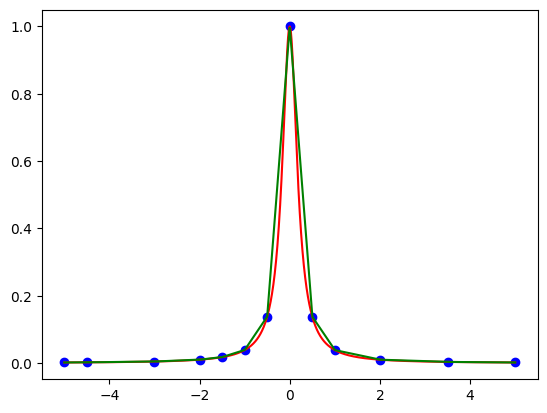

In [5]:
def R(x):
    return 1.0/(1.0 + 25.0*x**2)
# Interpolating points
xi = np.array([-5, -4.5, -3, -2, -1.5, -1, -0.5, 0, 0.5, 1,2,3.5, 5])
yi = R(xi)

# Define a set of points to evaluate the functions
xeval = np.linspace(-5, 5, 2000)
yeval = R(xeval)

# Compute the piecewise liner polynomial
ylin = interp1d(xi, yi, kind='linear')
# Plot everything
plt.plot(xi, yi, 'ob',
            xeval, yeval, '-r',
            xeval, ylin(xeval), '-g')

EXE 01.

MMQ

Para resolver o problema de mínimos quadrados, basta resolver as
chamadas equações normais, que são dadas

             aT * a * c = at * y
             
Lembremos que  era retangular, i.e.  ∈ ℝ(+1)×(+1)

B  = (at * a) ∈ ℝ(+1)×(+1), é quadrada!

a ordem do polinômio escolhido  é tipicamente pequeno!

B é não singular se  tem posto completo;

B é simétrica e definida positiva.

Exercicio 2


[0.00159744 0.00197141 0.00249377 0.00325468 0.00990099 0.00898876
 0.03846154 0.13793103 1.         0.01746725 0.00990099 0.00262295
 0.00197141 0.00159744]


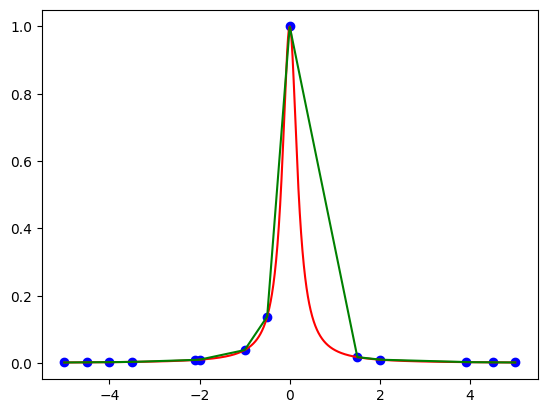

In [6]:
def R(x):
    return 1.0/(1 + 25.0*x**2)
# Interpolating points
#xi = np.linspace(-5,5,15)
xi =np.array([-5,-4.5,-4, -3.5, -2., -2.1,-1, -0.5,0, 1.5, 2 ,3.9, 4.5, 5])
yi = R(xi)
print(yi)


# Define a set of points to evaluate the functions
xeval = np.linspace(-5, 5, 2000)
yeval = R(xeval)

# Compute the piecewise liner polynomial
ylin = interp1d(xi, yi, kind='linear')
# Plot everything
plt.plot(xi, yi, 'ob',
            xeval, yeval, '-r',
            xeval, ylin(xeval), '-g')

[-5.  -4.5 -4.  -3.5 -2.5 -2.  -1.  -0.5  0.   1.5  2.   3.9  4.5  5. ]


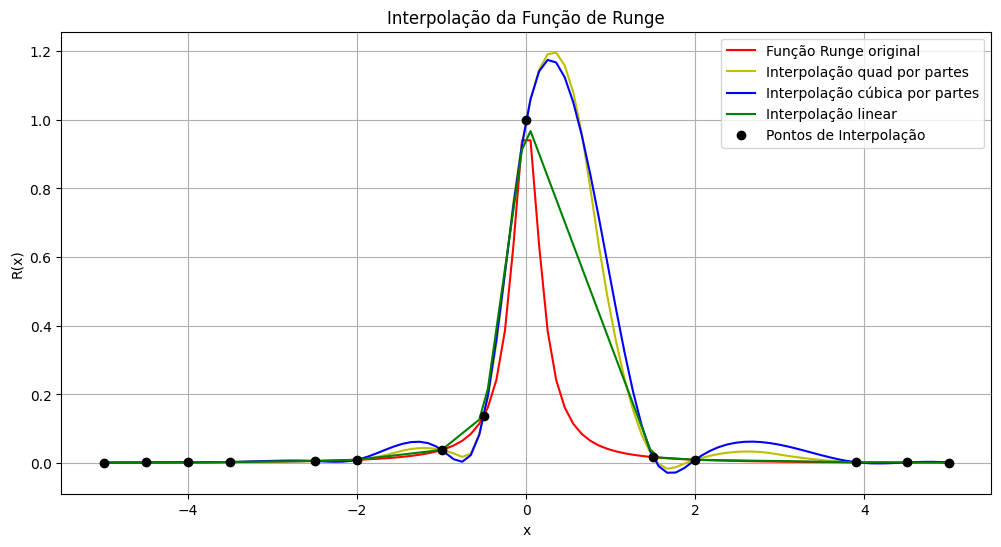

In [7]:


# unção de Runge
def R(x):
    return 1.0 / (1.0 + 25.0 * x**2)

# Pontos de interpolação 
xi =np.array([-5,-4.5,-4, -3.5, -2.5, -2,-1, -0.5,0, 1.5, 2 ,3.9, 4.5, 5])
#xi = np.linspace(-5,5,15)
yi = R(xi)
print(xi)
# Pontos para avaliação da função
xeval = np.linspace(-5, 5, 100)
yeval = R(xeval)


# Interpolação linear para comparação
y_linear = interp1d(xi, yi, kind='linear')

# Interpolação cúbica por partes
y_quad = interp1d(xi, yi, kind='quadratic')
# Interpolação cúbica por partes
y_cubica = interp1d(xi, yi, kind='cubic')


# Plotando os resultados
plt.figure(figsize=(12, 6))

# Função de Runge original
plt.plot(xeval, yeval, '-r', label='Função Runge original')

# Interpolação cúbica por partes
plt.plot(xeval, y_quad(xeval), '-y', label='Interpolação quad por partes')

# Interpolação cúbica por partes
plt.plot(xeval, y_cubica(xeval), '-b', label='Interpolação cúbica por partes')

# Interpolação linear
plt.plot(xeval, y_linear(xeval), '-g', label='Interpolação linear')

# Pontos de interpolação
plt.plot(xi, yi, 'ok', label='Pontos de Interpolação')

# Adicionando rótulos e título
plt.xlabel('x')
plt.ylabel('R(x)')
plt.title('Interpolação da Função de Runge')
plt.legend()
plt.grid(True)

# Mostrando o gráfico
plt.show()


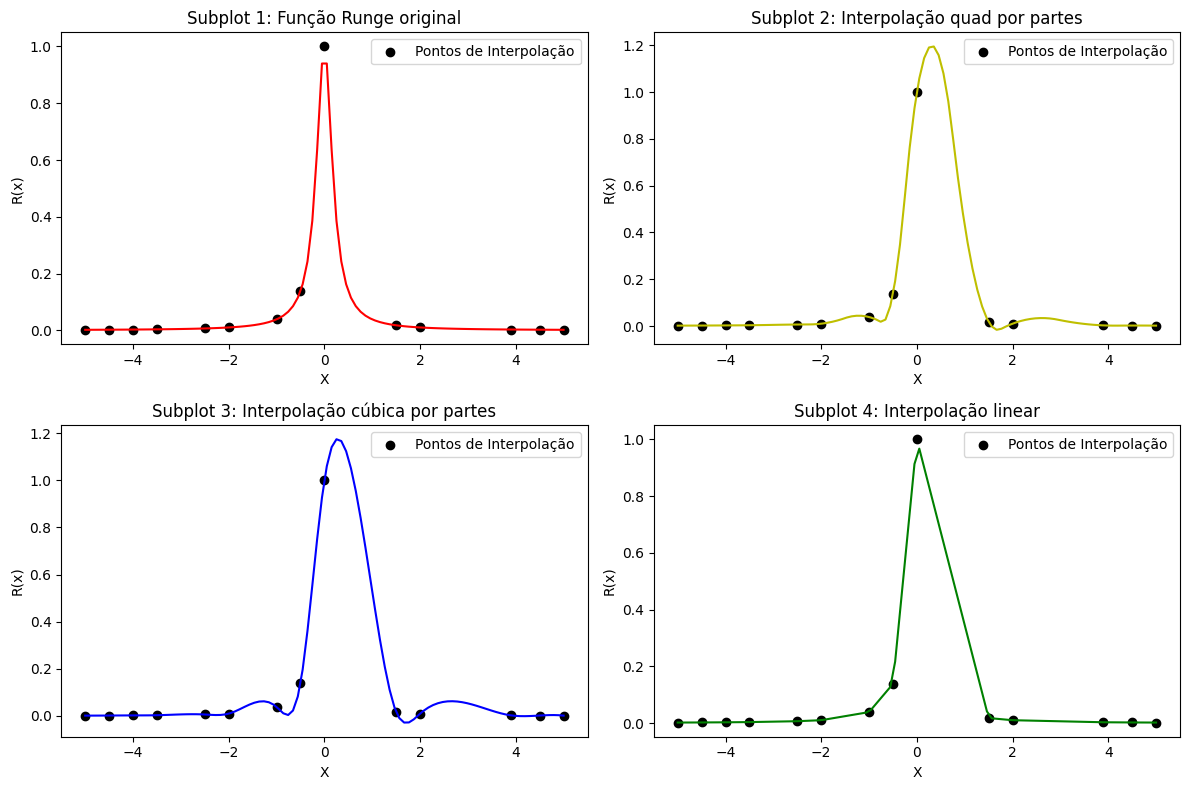

In [8]:

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Subplot 1: Original
axs[0, 0].plot(xeval, yeval, '-r')
axs[0, 0].scatter(xi, yi, c='k', marker='o', label='Pontos de Interpolação')
axs[0, 0].legend()
axs[0, 0].set_title('Subplot 1: Função Runge original')

# Subplot 2: Quadratic 
axs[0, 1].plot(xeval, y_quad(xeval), '-y')
axs[0, 1].scatter(xi, yi, c='k', marker='o', label='Pontos de Interpolação')
axs[0, 1].legend()
axs[0, 1].set_title('Subplot 2: Interpolação quad por partes')

# Subplot 3: Cubic
axs[1, 0].plot(xeval, y_cubica(xeval), '-b')
axs[1, 0].scatter(xi, yi, c='k', marker='o', label='Pontos de Interpolação')
axs[1, 0].legend()
axs[1, 0].set_title('Subplot 3: Interpolação cúbica por partes')

# Subplot 4: Linear xi = np.random.uniform(-5,5,10)
axs[1, 1].plot(xeval, y_linear(xeval), '-g')
axs[1, 1].scatter(xi, yi, c='k', marker='o', label='Pontos de Interpolação')
axs[1, 1].legend()
axs[1, 1].set_title('Subplot 4: Interpolação linear')

# Adding labels to each axis
for ax in axs.flat:
    ax.set(xlabel='X', ylabel='R(x)')

# Automatically adjust subplot parameters to give specified padding
fig.tight_layout()

# Show the plot
plt.show()

Exe 3.

Anotação em papel

Exe 4.

Text(0.5, 0.92, 'Superfície de Regressão Linear')

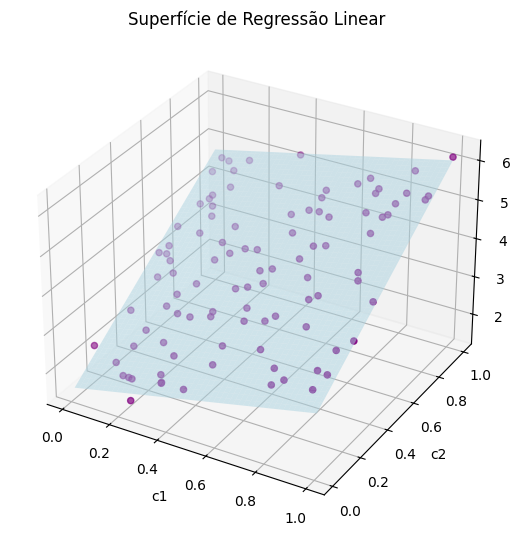

In [9]:
# Função para ler os dados do arquivo data.txt e preenchê-los nas listas
def Leitura(vet1, vet2, vet3, vet4):
    with open("data.txt", "r") as arquivo:
        for linha in arquivo:
            conteudo = linha.strip().split()
            vet1.append(float(conteudo[0]))
            vet2.append(float(conteudo[1]))
            vet3.append(float(conteudo[2]))
            vet4.append(float(conteudo[3]))

# Inicializando as listas para armazenar os dados
c1 = []
c2 = []
c3 = []
c4 = []

# Chamando a função para preencher as listas com os dados do arquivo
Leitura(c1, c2, c3, c4)

# Converter as listas em arrays NumPy
c1 = np.array(c1)
c2 = np.array(c2)
c3 = np.array(c3)
c4 = np.array(c4)

# Formar a matriz de design para regressão linear múltipla
# A matriz A tem len(c1) linhas 
A = np.zeros((len(c1), 3))
A[:, 0] = 1  # Coluna de termos constantes (intercepto)
A[:, 1] = c1  # Termo linear da variável c1
A[:, 2] = c2  # Termo linear da variável c2'''
#A = np.column_stack((np.ones(c1.shape), c1, c2))


# Calcular a solução das equações normais
A_transp = A.T  # Transposta de A
B = A_transp @ A  # Produto A_transp * A
y = c4  # A variável dependente

# Resolver o sistema de equações normais para encontrar os coeficientes
c = np.linalg.solve(B, A_transp @ y)

# Criação de uma grade para os pontos x e y
x_grid = np.linspace(min(c1), max(c1), 100)
y_grid = np.linspace(min(c2), max(c2), 100)

# Formar as matrizes de grade para x e y
x, y = np.meshgrid(x_grid, y_grid)

# Calcular os valores de z na grade usando os coeficientes encontrados
z = c[0] + x * c[1] + y * c[2]

# Plotagem 3D dos dados e da superfície de regressão
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(121, projection='3d')

# Plotar os pontos de dados originais
ax.scatter(c1, c2, c4, color='purple', label='Dados Originais')

# Plotar a superfície de regressão linear ajustada
ax.plot_surface(x, y, z, color='lightblue',label=('Superficie de progressão'), alpha=0.5)

# Configurar os rótulos dos eixos
ax.set_xlabel('c1')
ax.set_ylabel('c2')
ax.set_zlabel('c4')
ax.set_title('Superfície de Regressão Linear')




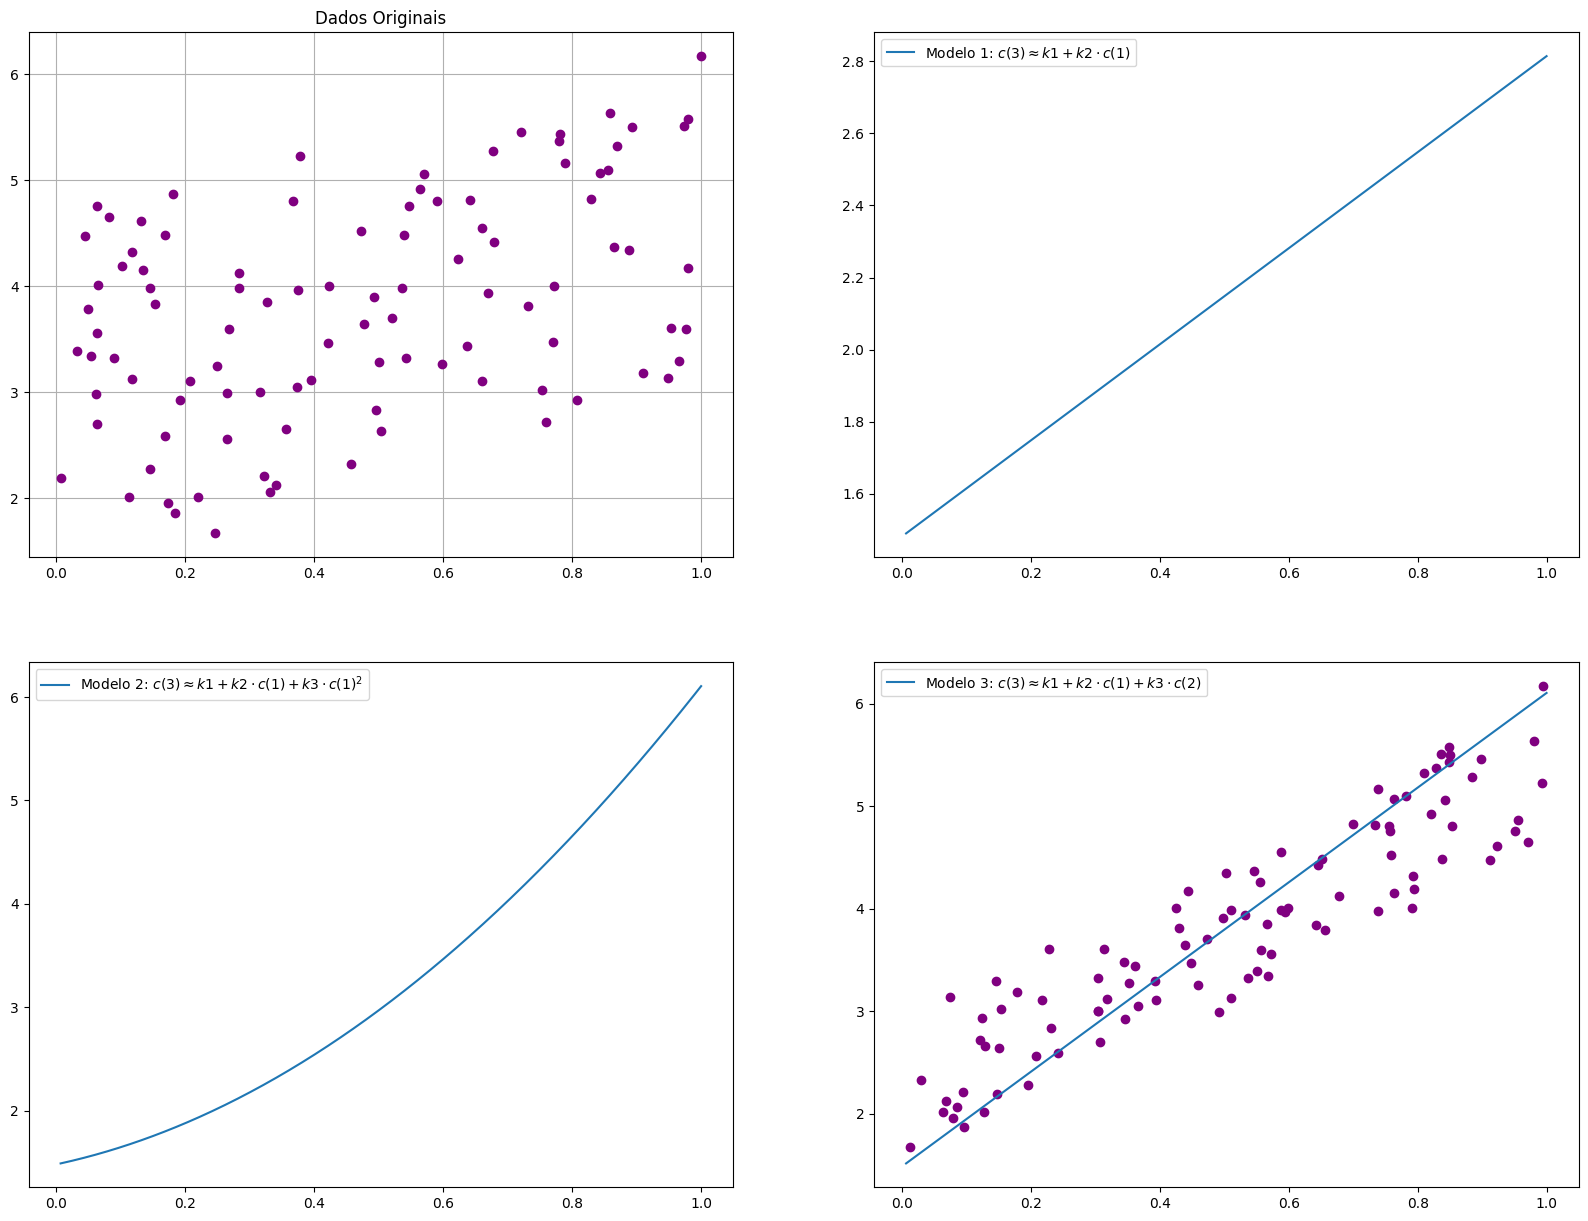

In [10]:

#Segunda Parte, usando os modelos 
# Avaliar o polinômio ajustado no intervalo para 2D plots
x_eval = np.linspace(min(c1), max(c1), 500)

# Criar figura e subplots
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

# Gráfico para os Dados Originais
ax[0, 0].plot(c1, c4, 'o', color="purple")
ax[0, 0].grid()
ax[0, 0].set_title('Dados Originais')

# Gráfico para o Modelo 1
# Modelo 1: c(3) ≈ k1 + k2 * c(1)
y_eval1 = np.polyval([c[1],c[0]], x_eval)
ax[0, 1].plot(x_eval, y_eval1, label=r'Modelo 1: $c(3) \approx k1 + k2 \cdot c(1)$')
ax[0, 1].legend()

# Gráfico para o Modelo 2
# Modelo 2: c(3) ≈ k1 + k2 * c(1) + k3 * c(1)^2
y_eval2 = np.polyval([c[2],c[1],c[0]], x_eval)
ax[1, 0].plot(x_eval, y_eval2, label=r'Modelo 2: $c(3) \approx k1 + k2 \cdot c(1) + k3 \cdot c(1)^2$')
ax[1, 0].legend()

# Gráfico para o Modelo 3
# Modelo 3: c(3) ≈ k1 + k2 * c(1) + k3 * c(2)
# Para avaliar este modelo precisamos resolver as equações normais 
A_model3 = np.zeros((len(c1), 3))
A_model3[:, 0] = 1  # Coluna de termos constantes (intercepto)
A_model3[:, 1] = c1  # Termo linear da variável c1
A_model3[:, 2] = c2  
B_model3 = A_model3.T @ A_model3
coef3 = np.linalg.solve(B_model3, A_model3.T @ c4)

#c(3) ≈ k1 + k2 * c(1) + k3 * c(2)
y3 = coef3[0] + x_eval * coef3[1] + (x_eval) * coef3[2]
ax[1, 1].plot(x_eval, y3, label=r'Modelo 3: $c(3) \approx k1 + k2 \cdot c(1) + k3 \cdot c(2)$')
ax[1, 1].scatter(c2, c4, color='purple')

ax[1, 1].legend()


# Exibir os gráficos
plt.show()


Exe 5 - Regras de Newton-Cotes


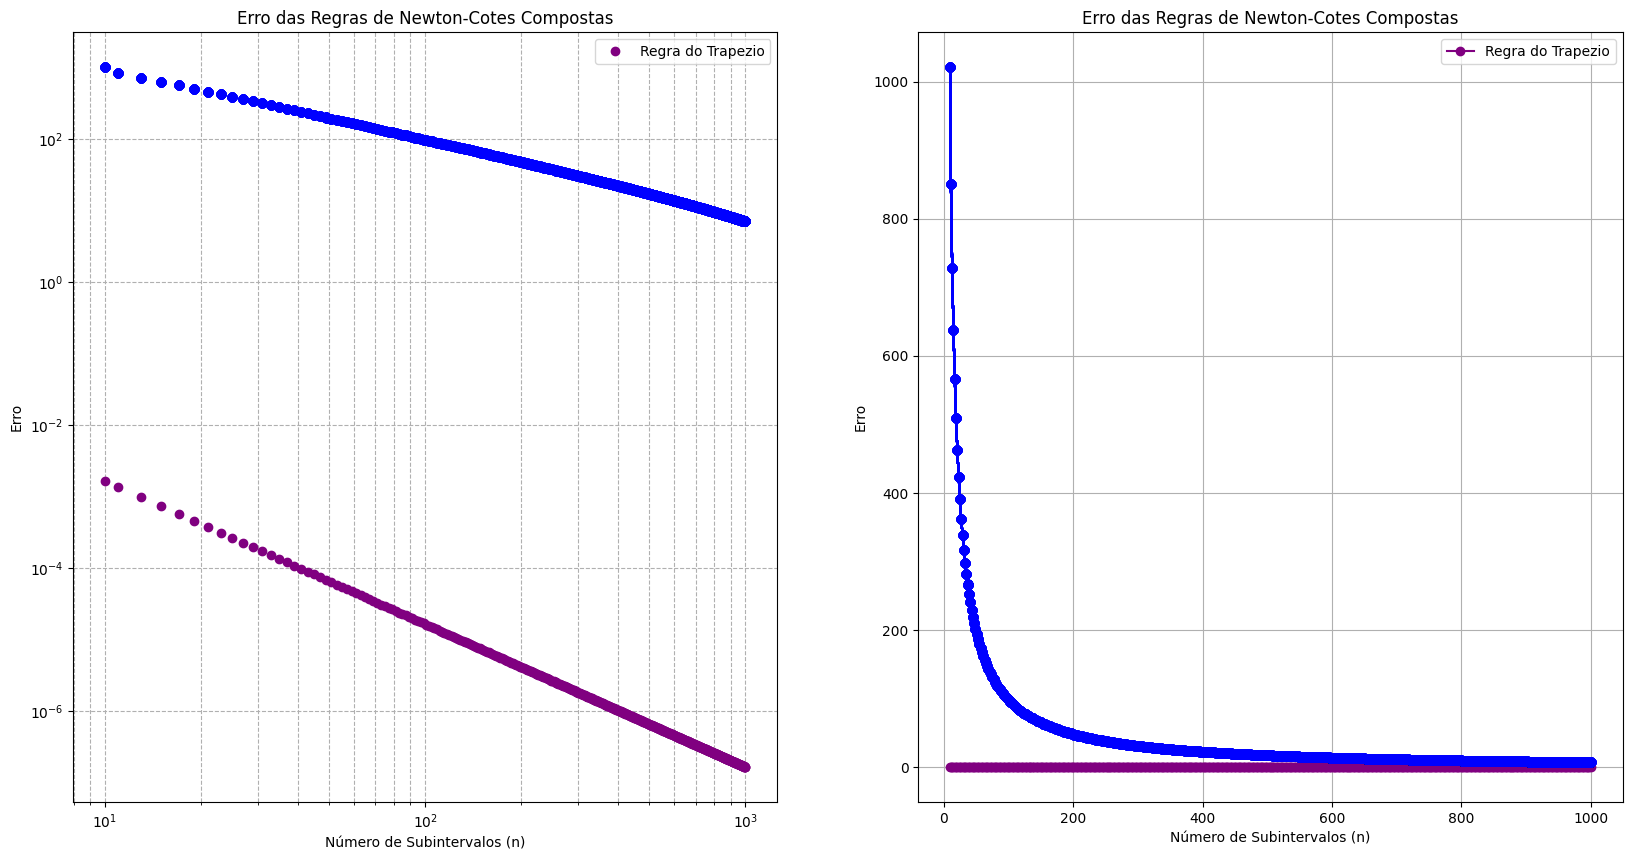

In [18]:
def f(x):
    return 4 / (1 + x**2)

def regra_trapezio(f, a, b, n):
    #as particoes
    dx=( b-a)/n
    x = np.linspace(a,b, n+1)
    y = f(x)
    valor = (dx/2)*(y[0]+ 2 *np.sum(y[1:-1]) + y[-1]) #-1 pq nao caluclamos nos extremos
    return valor

def ponto_medio(a,b):
    return (a+B)/2

def simpson(f,a ,b ,n):
    #requisito: n ser par
    if n%2 != 0:
       n += 1 
       
    dx = (b-a)/n
    y = f(x)
    varImpares =np.sum(y[1:-1:2])
    varPares = np.sum(y[2:-1:2])
    valor = (dx/6) * (y[0] + 2 *varImpares + 2* varPares+ y[-1])
    return valor

valorexato = np.pi
errosimp = []
errotrap = []
N = np.linspace(10,10**3,500, dtype=int)
for i in N:
   
    trapezio = regra_trapezio(f, 0,1, i)
    simp = simpson(f, 0,1,i)

    errosimp.append(abs(valorexato - simp))
    errotrap.append(abs(valorexato - trapezio))


fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].loglog(N, errotrap, 'o', color='purple', label='Regra do Trapezio')
ax[0].loglog(N, errosimp, 'o', color='blue', label='')
ax[0].set_xlabel('Número de Subintervalos (n)')
ax[0].set_ylabel('Erro')
ax[0].set_title('Erro das Regras de Newton-Cotes Compostas')
ax[0].legend()
ax[0].grid(True, which="both", ls="--")

ax[1].plot(N, errotrap, 'o-', color='purple', label='Regra do Trapezio')
ax[1].plot(N, errosimp, 'o-', color='blue', label='')
ax[1].set_xlabel('Número de Subintervalos (n)')
ax[1].set_ylabel('Erro')
ax[1].set_title('Erro das Regras de Newton-Cotes Compostas')
ax[1].legend()
ax[1].grid()
plt.show()



Exe 6


In [ ]:
import math
def rede(nx, ny, X):
    nv = nx * ny
    nc = (nx - 1) * ny + (ny - 1) * nx
    
    coord = np.zeros(shape=(nv, 2))

    for i in range(nx):
        for j in range(ny):
            ig = i + j * nx
            coord[ig, 0] = i
            coord[ig, 1] = j

    conec = np.zeros(shape=(nc, 2), dtype=int)
    C = np.zeros(nc)
    
    # Loop sobre canos horizontais
    for j in range(ny):
        for i in range(nx - 1):
            k = j * (nx - 1) + i
            conec[k, 0] = j * nx + i
            conec[k, 1] = j * nx + i + 1
            C[k] = 2.3 + 10 * pow(math.e, -pow(X - 5, 2))
            

    # Loop sobre canos verticais
    for i in range(nx):
        for j in range(ny - 1):
            k = (nx - 1) * ny + j * nx + i
            conec[k, 0] = i + j * nx
            conec[k, 1] = i + (j + 1) * nx
            C[k] = 1.8 + 10 * pow(math.e, -pow(X - 5, 2))

    return nv, nc, conec, C, coord

def Assembly(conec, c, nc, nv):
  
    a = np.zeros(shape=(nv, nv)) #matriz zerada
     
    for k in range(nc):
        n1 =conec[k,0]-1
        n2=conec[k,1]-1

        a[n1,n2] += c[k]
        a[n2,n1] += c[k]
        a[n1,n1] += c[k]
        a[n2,n2] += c[k]
   
    for i in range(nv):
        for j in range(nv):
            if( i != j and a[i,j] !=0):
                a[i,j]*=-1
    return a



def SolveNetwork(conec,c, natm, nb, qb,nv, nc):
    Atilde = Assembly(conec, c, nv, nc)
    natm -= 1
    nb -= 1
    Atilde[natm, :] = 0
    Atilde[natm, natm] = 1
    b = np.zeros(shape=(len(Atilde), 1))
    b[nb] = qb
    pressure = np.linalg.solve(Atilde, b)
    return pressure

def matrizes(conec,c, nv, nc):
     
    #K = np.diag(c)
    K = np.zeros(shape=(nc, nc))
    d = np.zeros(shape=(nc, nv))

    for i in range(nc):
        K[i,i] = c[i]

    for k in range(nc):
        for j in range(nv):
            j1 = conec[k,0]-1
            j2 =conec[k,1]-1
            d[k,j1] = 1
            d[k,j2] = -1 
    
    return K, d

def calc_vazao(conec, c, pressao, nv, nc):
   
    K = np.zeros(shape=(nc, nc))
    D = np.zeros(shape=(nc,nv))

    K, D = matrizes(conec, c)
    Q =((K @ D) @ pressao) 

    return Q

def calc_W(conec, pressao, nv, nc):
    
    K = np.zeros(shape=(nc, nc))
    D = np.zeros(shape=(nc,nv))

    K, D = matrizes(conec, pressao)
    #Q =((K @ D) @ pressao) 

    W = np.transpose(pressao) @ (np.transpose(D)@ K @ D)@ pressao

    return W

def CalculaPot(X):
    n, m = 8, 9
    QB = 3
    nAtm = n * m - 1
    nB = 0
    
    W = []

    for x in X:
        ch = 2.3 +10 * pow(math.e, -pow(x - 5, 2))
        cv = 1.8 + 10 * pow(math.e, -pow(x - 5, 2))
        nv, nc, conec, C, coord = rede(n, m, x)
        P = SolveNetwork(conec, C, nAtm, nB, QB, nv, nc)
        vazao = calc_vazao(conec, C,P,  nv, nc)
        W.append(vazao) 
    
    return np.array(W)



In [ ]:
def integral(a, b, n, w):
    pm = ponto_medio(a,b)
    trap = regra_trapezio(w, a,b, n)
    rsimp = simpson(w,a, b, n)
    print(pm, trap, rsimp)
    return pm, trap, rsimp

n = np.linspace(1, 10, 10)
P =np.zeros(10)
P = CalculaPot(n)

plt.plot(n, P)
plt.show()

a = 1
b = 10

N = np.arrange(1,101)
pontoMedio_results = []
trapezio_results = []
Simpson_results = []

# Compute the integrals for each n
for n in N:
    pontoMedio_results.append(ponto_medio(a, b, n))
    trapezio_results.append(regra_trapezio(a, b, n))
    Simpson_results.append(simpson(a, b, n))

# Plotting the results
plt.figure(figsize=(12, 6))

plt.plot(N, pontoMedio_results, label="Regra do ponto médio")
plt.plot(N, trapezio_results, label="Regra do trapézio")
plt.plot(N, Simpson_results, label="Regra de Simpson")

plt.xlabel('Número de subdivisões (n)')
plt.ylabel('Valor da Integral')
plt.title('Comparação de Regras de Integração Numérica')

plt.grid(True)

plt.show()

LinAlgError: Singular matrix